Long Short Term Memory

[Code Example](https://www.geeksforgeeks.org/long-short-term-memory-lstm-rnn-in-tensorflow/)

[Concept Explaination](https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/lstm)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

2024-12-10 06:22:32.614931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-10 06:22:32.718597: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [44]:
vaccinations = pd.read_csv('./../Data/Final_Datasets/country_vaccinations.csv')

vaccinations = vaccinations[vaccinations['country'] == "United Kingdom"]

# print(vaccinations)

period_start = vaccinations.iloc[0]['date']
period_end = vaccinations.iloc[len(vaccinations) - 1]['date']

print(period_start)
print(period_end)

2021-01-10
2022-03-28


In [45]:
cases = pd.read_csv('./../Data/Final_Datasets/country_death_case.csv',
                 index_col='Date_reported',
                 parse_dates=True)

cases = cases[cases['Country'] == "United Kingdom of Great Britain and Northern Ireland"]
# trim the cases to the dates of the vaccinations
cases = cases.loc[period_start:period_end]
cases = cases['New_cases']
print(cases)
# cases.index.freq = 'MS'

Date_reported
2021-01-10    48105.0
2021-01-11    40035.0
2021-01-12    37174.0
2021-01-13    58592.0
2021-01-14    50647.0
               ...   
2022-03-24    99095.0
2022-03-25    94185.0
2022-03-26    82905.0
2022-03-27    72430.0
2022-03-28    61456.0
Name: New_cases, Length: 443, dtype: float64


In [46]:
cases

Date_reported
2021-01-10    48105.0
2021-01-11    40035.0
2021-01-12    37174.0
2021-01-13    58592.0
2021-01-14    50647.0
               ...   
2022-03-24    99095.0
2022-03-25    94185.0
2022-03-26    82905.0
2022-03-27    72430.0
2022-03-28    61456.0
Name: New_cases, Length: 443, dtype: float64

<AxesSubplot: xlabel='Date_reported'>

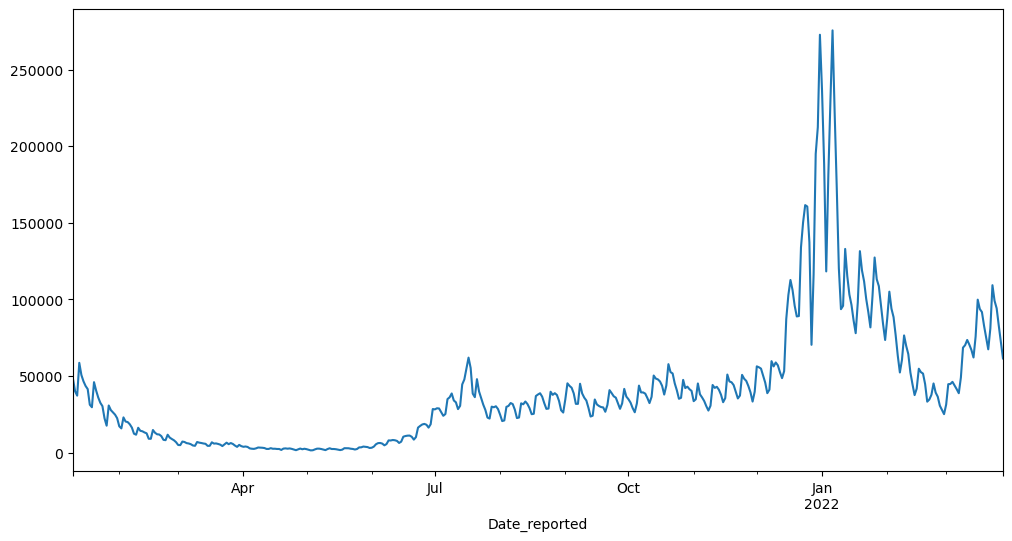

In [47]:
# Plotting graph b/w production and date
cases.plot(figsize=(12, 6))

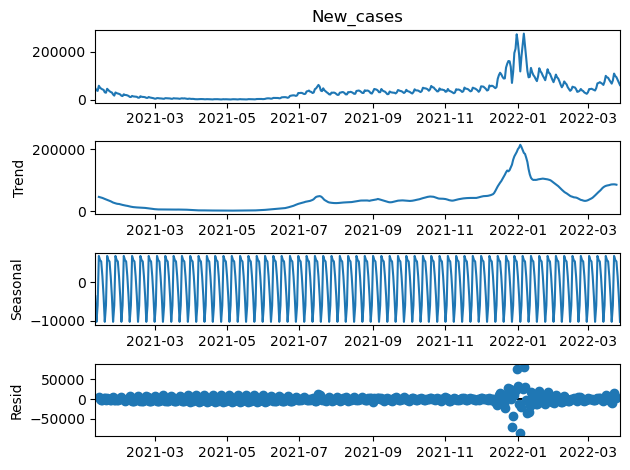

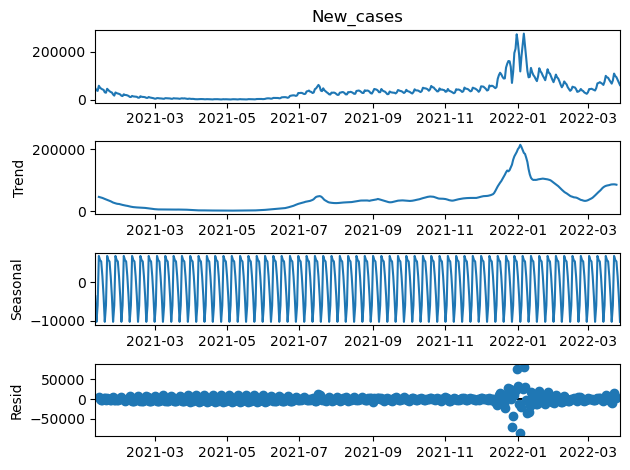

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(cases)
results.plot()

In [49]:
train = cases.iloc[:300]
test = cases.iloc[300:]

array = train.to_numpy()
array.reshape(-1, 1)
train = pd.DataFrame(array)

array = test.to_numpy()
array.reshape(-1, 1)
test = pd.DataFrame(array)

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [51]:
from keras.preprocessing.sequence import TimeseriesGenerator
 
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)

Given the Array: 
[0.77058464 0.63734377 0.59010682]
Predict this y: 
 [[0.94373174]]


In [52]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu',
               input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
model.fit(generator, epochs=5)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
288/288 [==============================] - 2s 4ms/step - loss: 0.0178
Epoch 2/5
288/288 [==============================] - 1s 4ms/step - loss: 0.0091
Epoch 3/5
288/288 [==============================] - 1s 4ms/step - loss: 0.0086
Epoch 4/5
288/288 [==============================] - 1s 4ms/step - loss: 0.0076
Epoch 5/5
288/288 [==============================] - 1s 4ms/step - loss: 0.0067


Now try with Vaccination data included in the regression

In [39]:
vaccinations = pd.read_csv('./../Data/Final_Datasets/country_vaccinations.csv')

vaccinations = vaccinations[vaccinations['country'] == "United Kingdom"]

# print(vaccinations)

period_start = vaccinations.iloc[0]['date']
period_end = vaccinations.iloc[len(vaccinations) - 1]['date']

cases = pd.read_csv('./../Data/Final_Datasets/country_death_case.csv',
                 index_col='Date_reported',
                 parse_dates=True)

cases = cases[cases['Country'] == "United Kingdom of Great Britain and Northern Ireland"]
# trim the cases to the dates of the vaccinations
cases = cases.loc[period_start:period_end]
cases = cases['New_cases']
cases = pd.DataFrame(cases)
cases.insert(1, "daily_vaccinations", vaccinations["daily_vaccinations"].tolist(), True)
print(cases)

               New_cases  daily_vaccinations
Date_reported                               
2021-01-10       48105.0                 0.0
2021-01-11       40035.0            165844.0
2021-01-12       37174.0            194785.0
2021-01-13       58592.0            226086.0
2021-01-14       50647.0            250052.0
...                  ...                 ...
2022-03-24       99095.0             34110.0
2022-03-25       94185.0             33823.0
2022-03-26       82905.0             33398.0
2022-03-27       72430.0             32769.0
2022-03-28       61456.0             32275.0

[443 rows x 2 columns]


In [40]:
train = cases.iloc[:300]
test = cases.iloc[300:]

array = train.to_numpy()
array.reshape(-1, 1)
train = pd.DataFrame(array)

array = test.to_numpy()
array.reshape(-1, 1)
test = pd.DataFrame(array)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [42]:
from keras.preprocessing.sequence import TimeseriesGenerator
 
n_input = 3
n_features = 2
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)

Given the Array: 
[0.77058464 0.         0.63734377 0.2753667  0.59010682 0.32342022]
Predict this y: 
 [[0.94373174 0.37539227]]


In [43]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu',
               input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
model.fit(generator, epochs=5)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               41200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 41,301
Trainable params: 41,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
288/288 [==============================] - 2s 5ms/step - loss: 0.0796
Epoch 2/5
288/288 [==============================] - 1s 4ms/step - loss: 0.0745
Epoch 3/5
288/288 [==============================] - 1s 5ms/step - loss: 0.0736
Epoch 4/5
288/288 [==============================] - 1s 5ms/step - loss: 0.0734
Epoch 5/5
288/288 [==============================] - 1s 5ms/step - loss: 0.0729
